## Observations and Insights 

1. When viewing the Final Tumor Volume by Drug box plot, we can see that Capomulin and Ramicane seem to have relatively comparable efficacy in tumor size reduction and greatly outperform over Infubinol and Ceftamine.


2. These results would be more reliable by if all four major drug trials were run on an identical number of test subjects. (Capomulin: 230 mice and Ramicane 228 mice, vs Infubinol: 178 mice and Ceftamine: 178 mice). 


3. The heavier the mouse, the less effective treatment is, as demonstrated in the scatter plot "Average Tumor Volume (mm3) vs Mouse Weight (g)." This is also shown through the strong positive correlation value of 0.84. 


4. This is, surprisingly, an extremely sex-balanced study with a 51% v 49% split between male and female mice. It would be beneficial to run additional analysis to see the effects of each drug on the basis of sex.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# view orig data before combining
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
# view orig data before combining
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
count = mouse_study['Mouse ID'].value_counts()
print(f"There are a total of {len(count)} mice.")

There are a total of 249 mice.


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Found fantastic df.duplicated walkthrough athttps://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
duplicate = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
print("Duplicate Rows based on Mouse ID and Timepoint: ")
duplicate

Duplicate Rows based on Mouse ID and Timepoint: 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
print(f"The mouse that needs to be removed from our dataframe is Mouse ID {duplicate['Mouse ID'][909]}.")

The mouse that needs to be removed from our dataframe is Mouse ID g989.


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = mouse_study.loc[mouse_study["Mouse ID"] == "g989"]
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
g989.count()

Mouse ID              13
Drug Regimen          13
Sex                   13
Age_months            13
Weight (g)            13
Timepoint             13
Tumor Volume (mm3)    13
Metastatic Sites      13
dtype: int64

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study = mouse_study.loc[mouse_study["Mouse ID"] != "g989"]
clean_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
new_count = clean_study['Mouse ID'].value_counts()
print(f"There are now a total of {len(new_count)} mice included in our study.")

There are now a total of 248 mice included in our study.


## Summary Statistics

In [12]:
clean_study["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [13]:
# Run summary statistics calculations grouped by Drug Regimen 
drug_mean = clean_study.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
drug_median = clean_study.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
drug_var = clean_study.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
drug_sd = clean_study.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
drug_sem = clean_study.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# create and format df
drug_summary_df = pd.DataFrame({
    "Mean": drug_mean.map('{:.2f}'.format),
    "Median": drug_median.map('{:.2f}'.format),
    "Variance": drug_var.map('{:.2f}'.format),
    "Standard Deviation": drug_sd.map('{:.2f}'.format),
    "SEM": drug_sem.map('{:.2f}'.format)
})

drug_summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [14]:
# Alternative method - slim df down to drug regimen & tumor info and use to create a groupbydf on drug regimen 
sumdata = clean_study[["Drug Regimen", "Tumor Volume (mm3)"]]
groupbydf = sumdata.groupby(["Drug Regimen"])

# run calcluations while creating & formatting df 
drug_summary_df2 = pd.DataFrame({
    "Mean": groupbydf["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": groupbydf["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Variance": groupbydf["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Deviation": groupbydf["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": groupbydf["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
    
})

drug_summary_df2

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [15]:
regimen_count = clean_study.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_df = pd.DataFrame({"Mice": regimen_count})
regimen_df

,Mice
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


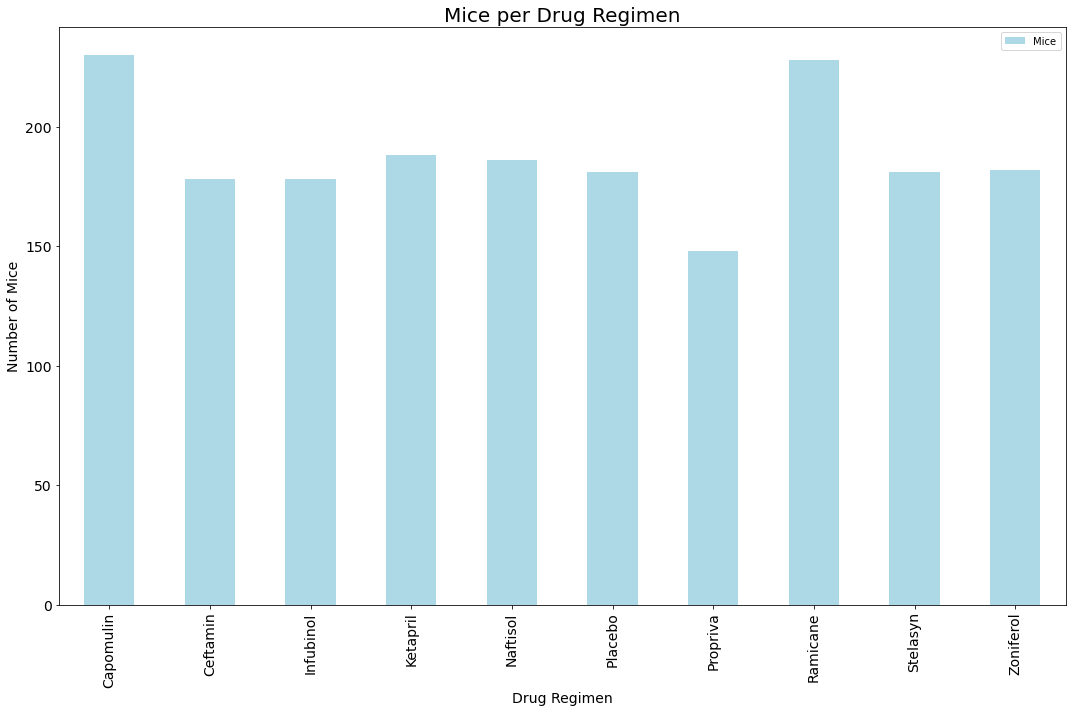

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count = clean_study.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_df = pd.DataFrame({"Mice": regimen_count})
regimen_df

regimen_df.plot(kind="bar", figsize=(15,10), facecolor="lightblue", fontsize=14)
plt.title("Mice per Drug Regimen", fontsize=20)
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Number of Mice", fontsize=14)
plt.tight_layout()

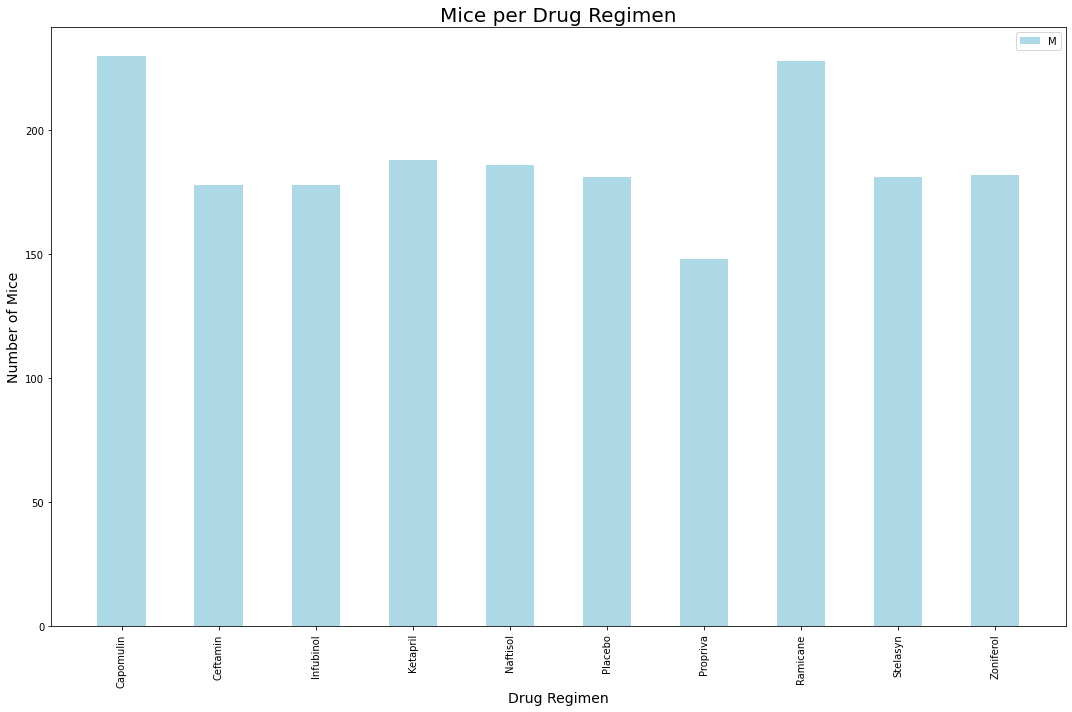

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen_count = clean_study.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_df = pd.DataFrame({"Mice": regimen_count})

plt.figure(figsize=(15,10))
plt.bar(regimen_count.index, regimen_count, width=0.5, color="lightblue", align="center")
plt.xticks(regimen_count.index, rotation="vertical")
plt.title("Mice per Drug Regimen", fontsize=20)
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Number of Mice", fontsize=14)
plt.legend("Mice",loc="best") # I cannot figure out how to move the legend, obviously that is not the best location.
plt.tight_layout()

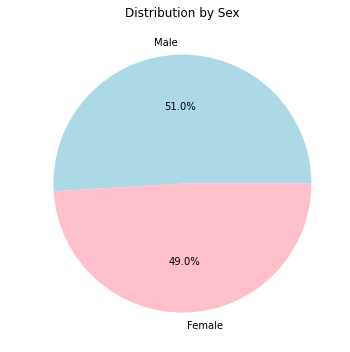

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = clean_study["Sex"].value_counts()

gender_plot = mice_gender.plot(kind="pie", autopct="%1.1f%%", title='Distribution by Sex', figsize=(15,5),
                 colors=["lightblue", "pink"], explode=[0,0])
gender_plot.set_ylabel(" ")
plt.tight_layout()

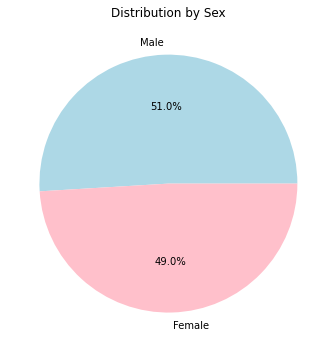

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender = clean_study["Sex"].value_counts()
colors = ["lightblue", "pink"]
explode = [0,0]

plt.figure(figsize=(15,5))
plt.pie(mice_gender.values, autopct="%1.1f%%", colors=colors, explode=explode, labels=mice_gender.index.values)
plt.title("Distribution by Sex")
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_tp = pd.DataFrame(clean_study.groupby(["Mouse ID"])["Timepoint"].max()).rename(columns={"Timepoint": "Max Timepoint"})
max_tp

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_study, max_tp, on="Mouse ID")
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_vals = []

for drug in drugs:
    drug_df = merged_df.loc[merged_df["Drug Regimen"] == drug]
    
    # narrow down to look through rows containing the max timepoint
    final_vol = drug_df.loc[drug_df["Timepoint"] == drug_df["Max Timepoint"]]
    tumor_vol = final_vol["Tumor Volume (mm3)"]
    drug_vals.append(tumor_vol)
   
    # Calculate and print the IQR for each drug regimen
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # find upper and lower bounds
    lowerb = lowerq - (1.5*iqr)
    upperb = upperq + (1.5*iqr)
    
    # print statements
    print(f"The IQR for {drug}: {iqr}.")
    print(f"Values below {lowerb} could be {drug} outliers.")
    print(f"Values above {upperb} could be {drug} outliers.")

    

The IQR for Capomulin: 7.781863460000004.
Values below 20.70456164999999 could be Capomulin outliers.
Values above 51.83201549 could be Capomulin outliers.
The IQR for Ramicane: 9.098536719999998.
Values below 17.912664470000003 could be Ramicane outliers.
Values above 54.30681135 could be Ramicane outliers.
The IQR for Infubinol: 11.477135160000003.
Values below 36.83290494999999 could be Infubinol outliers.
Values above 82.74144559000001 could be Infubinol outliers.
The IQR for Ceftamin: 15.577752179999997.
Values below 25.355449580000002 could be Ceftamin outliers.
Values above 87.66645829999999 could be Ceftamin outliers.


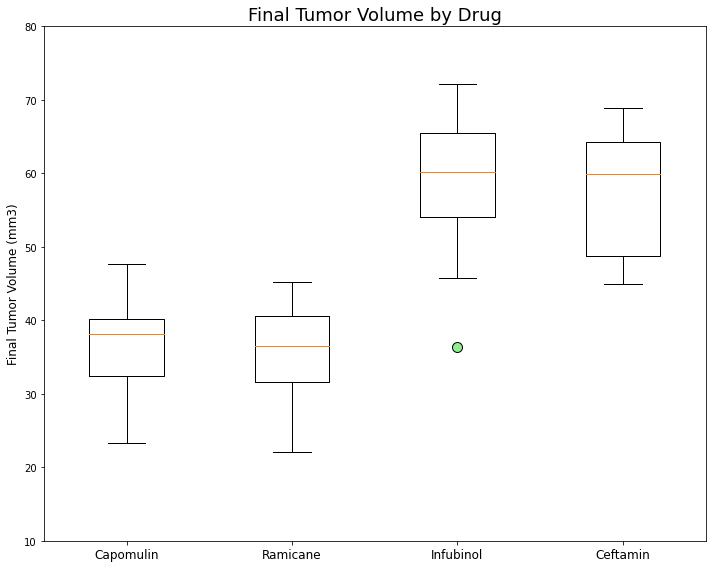

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# edit outliers
flierprops = dict(marker='o', markerfacecolor='lightgreen', markersize=10, markeredgecolor='black')

# plot boxplot
plt.figure(figsize=(10,8))
plt.boxplot(drug_vals, flierprops=flierprops)
plt.title("Final Tumor Volume by Drug", fontsize=18)
plt.ylabel("Final Tumor Volume (mm3)", fontsize=12)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], fontsize=12)
plt.ylim(10, 80)
plt.tight_layout()


## Line and Scatter Plots

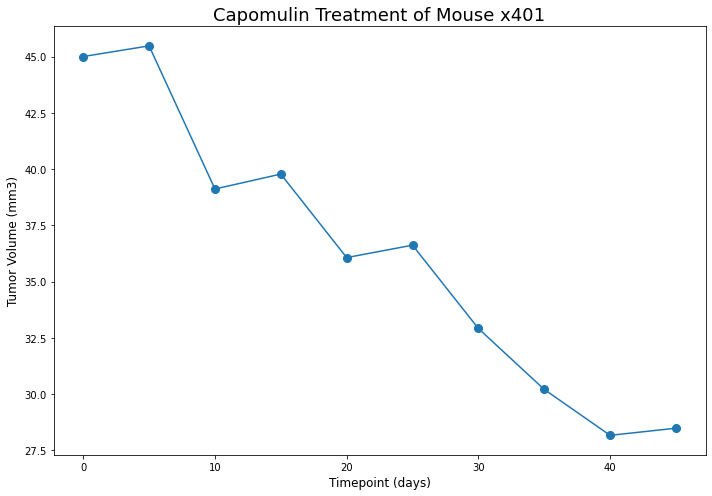

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = clean_study.loc[clean_study["Mouse ID"] == "x401"]

plt.figure(figsize=(10,7))
plt.plot(mouse["Timepoint"], mouse['Tumor Volume (mm3)'], marker = 'o', markersize=8)
plt.xlabel("Timepoint (days)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.title("Capomulin Treatment of Mouse x401", fontsize=18)
plt.tight_layout()


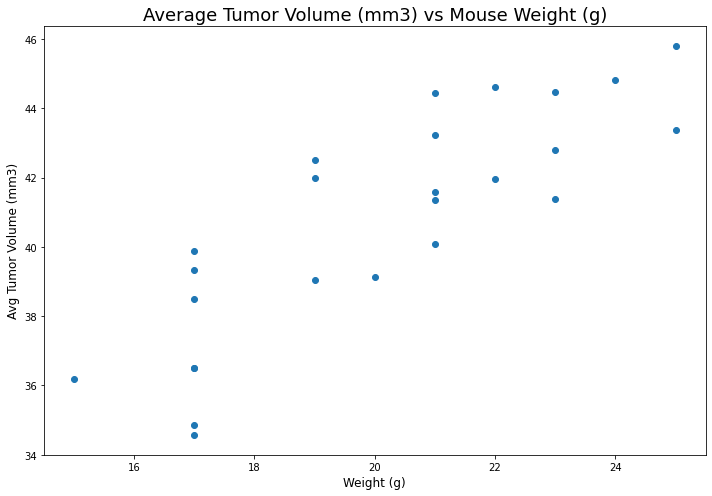

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# separate df by Capomulin regimen
Capomulin_df = clean_study.loc[clean_study["Drug Regimen"] == "Capomulin"]
add_avg_vol = pd.DataFrame(Capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()).rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume (mm3)"})

# merge avg tumor with capomulin df and drop dupes
vol_merge = pd.merge(Capomulin_df, add_avg_vol, on="Mouse ID")
avg_vol = vol_merge[["Weight (g)", "Avg Tumor Volume (mm3)"]].drop_duplicates()

x = avg_vol["Weight (g)"]
y = avg_vol["Avg Tumor Volume (mm3)"]



plt.figure(figsize=(10,7))
plt.scatter(x, y)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Avg Tumor Volume (mm3)", fontsize=12)
plt.title("Average Tumor Volume (mm3) vs Mouse Weight (g)", fontsize=18)
plt.tight_layout()



## Correlation and Regression

The correlation between weight and average tumor volume for subjects on the Capomulin regimen is 0.84


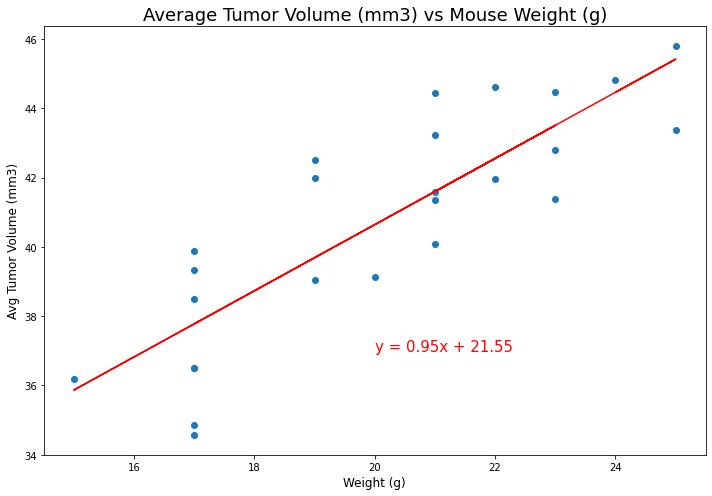

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# bring in code from scatter plot
Capomulin_df = clean_study.loc[clean_study["Drug Regimen"] == "Capomulin"]
add_avg_vol = pd.DataFrame(Capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()).rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume (mm3)"})
vol_merge = pd.merge(Capomulin_df, add_avg_vol, on="Mouse ID")
avg_vol = vol_merge[["Weight (g)", "Avg Tumor Volume (mm3)"]].drop_duplicates()
x = avg_vol["Weight (g)"]
y = avg_vol["Avg Tumor Volume (mm3)"]

# calculate correlation
correlation = st.pearsonr(x,y)
print(f"The correlation between weight and average tumor volume for subjects on the Capomulin regimen is {round(correlation[0],2)}")

# perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot linear regression on top of the scatter plot
plt.figure(figsize=(10,7))
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Avg Tumor Volume (mm3)", fontsize=12)
plt.title("Average Tumor Volume (mm3) vs Mouse Weight (g)", fontsize=18)
plt.tight_layout()
